# PS4E7 - Binary Classification of Insurance Cross Selling 🤝

# Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("./input/train.csv", index_col="id")
test = pd.read_csv("./input/test.csv", index_col="id")

original_train = pd.read_csv("./input/original_train.csv", index_col="id")
original_test = pd.read_csv("./input/original_test.csv", index_col="id")

# Dataset description

- id -> Unique ID for the customer;
- Gender ->Gender of the customer;
- Age ->Age of the customer;
- Driving_License ->0 : Customer does not have DL, 1 : Customer already has DL;
- Region_Code ->Unique code for the region of the customer;
- Previously_Insured ->1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance;
- Vehicle_Age ->Age of the Vehicle;
- Vehicle_Damage ->1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past;
- Annual_Premium ->The amount customer needs to pay as premium in the year;
- Policy_Sales_Channel ->Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc;
- Vintage ->Number of Days, Customer has been associated with the company;
- Response ->1 : Customer is interested, 0 : Customer is not interested;

Thanks to @gauravduttakiit for sharing [here](https://www.kaggle.com/competitions/playground-series-s4e7/discussion/515975).

# Transforming Data Types

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


Let's change some dtypes for optmization!

In [5]:
# Train
train["Gender"] = train["Gender"].apply(lambda x: True if x == "Male" else False)
train["Vehicle_Damage"] = train["Vehicle_Damage"].apply(lambda x: True if x == "Yes" else False)
train[["Driving_License", "Previously_Insured"]] = train[["Driving_License", "Previously_Insured"]].astype("bool")

train[["Region_Code", "Vehicle_Age"]] = train[["Region_Code", "Vehicle_Age"]].astype("category")

train["Age"] = train["Age"].astype("int8")
train["Vintage"] = train["Vintage"].astype("int16")

# Test
test["Gender"] = test["Gender"].apply(lambda x: True if x == "Male" else False)
test["Vehicle_Damage"] = test["Vehicle_Damage"].apply(lambda x: True if x == "Yes" else False)
test[["Driving_License", "Previously_Insured"]] = test[["Driving_License", "Previously_Insured"]].astype("bool")

test[["Region_Code", "Vehicle_Age"]] = test[["Region_Code", "Vehicle_Age"]].astype("category")

test["Age"] = test["Age"].astype("int8")
test["Vintage"] = test["Vintage"].astype("int16")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Gender                bool    
 1   Age                   int8    
 2   Driving_License       bool    
 3   Region_Code           category
 4   Previously_Insured    bool    
 5   Vehicle_Age           category
 6   Vehicle_Damage        bool    
 7   Annual_Premium        float64 
 8   Policy_Sales_Channel  float64 
 9   Vintage               int16   
 10  Response              int64   
dtypes: bool(4), category(2), float64(2), int16(1), int64(1), int8(1)
memory usage: 449.8 MB


In [7]:
# Train
original_train["Gender"] = original_train["Gender"].apply(lambda x: True if x == "Male" else False)
original_train["Vehicle_Damage"] = original_train["Vehicle_Damage"].apply(lambda x: True if x == "Yes" else False)
original_train[["Driving_License", "Previously_Insured"]] = original_train[["Driving_License", "Previously_Insured"]].astype("bool")

original_train[["Region_Code", "Vehicle_Age"]] = original_train[["Region_Code", "Vehicle_Age"]].astype("category")

original_train["Age"] = original_train["Age"].astype("int8")
original_train["Vintage"] = original_train["Vintage"].astype("int16")

# Test
original_test["Gender"] = original_test["Gender"].apply(lambda x: True if x == "Male" else False)
original_test["Vehicle_Damage"] = original_test["Vehicle_Damage"].apply(lambda x: True if x == "Yes" else False)
original_test[["Driving_License", "Previously_Insured"]] = original_test[["Driving_License", "Previously_Insured"]].astype("bool")

original_test[["Region_Code", "Vehicle_Age"]] = original_test[["Region_Code", "Vehicle_Age"]].astype("category")

original_test["Age"] = original_test["Age"].astype("int8")
original_test["Vintage"] = original_test["Vintage"].astype("int16")

In [8]:
original_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                381109 non-null  bool    
 1   Age                   381109 non-null  int8    
 2   Driving_License       381109 non-null  bool    
 3   Region_Code           381109 non-null  category
 4   Previously_Insured    381109 non-null  bool    
 5   Vehicle_Age           381109 non-null  category
 6   Vehicle_Damage        381109 non-null  bool    
 7   Annual_Premium        381109 non-null  float64 
 8   Policy_Sales_Channel  381109 non-null  float64 
 9   Vintage               381109 non-null  int16   
 10  Response              381109 non-null  int64   
dtypes: bool(4), category(2), float64(2), int16(1), int64(1), int8(1)
memory usage: 14.9 MB


# Data in a glance

## Train data

In [9]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,True,21,True,35.0,False,1-2 Year,True,65101.0,124.0,187,0
1,True,43,True,28.0,False,> 2 Years,True,58911.0,26.0,288,1
2,False,25,True,14.0,True,< 1 Year,False,38043.0,152.0,254,0
3,False,35,True,1.0,False,1-2 Year,True,2630.0,156.0,76,0
4,False,36,True,15.0,True,1-2 Year,False,31951.0,152.0,294,0


In [10]:
train.describe()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,3.838356e+01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,1.499346e+01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,2.000000e+01,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.400000e+01,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,3.600000e+01,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,4.900000e+01,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,8.500000e+01,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [11]:
train.select_dtypes(include=['category', 'bool']).describe()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage
count,11504798,11504798,11504798.0,11504798,11504798,11504798
unique,2,2,54.0,2,3,2
top,True,True,28.0,False,1-2 Year,True
freq,6228134,11482041,3451062.0,6178116,5982678,5783229


In [12]:
train.isna().value_counts()

Gender  Age    Driving_License  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response
False   False  False            False        False               False        False           False           False                 False    False       11504798
Name: count, dtype: int64

No missing values!

## Original dataset

In [13]:
original_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,True,44,True,28.0,False,> 2 Years,True,40454.0,26.0,217,1
2,True,76,True,3.0,False,1-2 Year,False,33536.0,26.0,183,0
3,True,47,True,28.0,False,> 2 Years,True,38294.0,26.0,27,1
4,True,21,True,11.0,True,< 1 Year,False,28619.0,152.0,203,0
5,False,29,True,41.0,True,< 1 Year,False,27496.0,152.0,39,0


In [14]:
original_train.describe()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,112.034295,154.347397,0.122563
std,15.511611,17213.155057,54.203995,83.671304,0.327936
min,20.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,540165.000000,163.000000,299.000000,1.000000


Same statistics as train dataset

In [15]:
original_train.select_dtypes(include=['category', 'bool']).describe()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109.0,381109,381109,381109
unique,2,2,53.0,2,3,2
top,True,True,28.0,False,1-2 Year,True
freq,206089,380297,106415.0,206481,200316,192413


# Synthetic vs Original dataset

In [16]:
train_clone = train.copy()
train_clone["original"] = False

original_train_clone = original_train.copy()
original_train_clone["original"] = True

together = pd.concat([train_clone, original_train_clone], axis=0)
together['Vehicle_Age'] = together['Vehicle_Age'].cat.codes
together['Response'] = together['Response'].astype('bool')

together.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,original
id,,,,,,,,,,,,
0,True,21,True,35.0,False,0,True,65101.0,124.0,187,False,False
1,True,43,True,28.0,False,2,True,58911.0,26.0,288,True,False
2,False,25,True,14.0,True,1,False,38043.0,152.0,254,False,False
3,False,35,True,1.0,False,0,True,2630.0,156.0,76,False,False
4,False,36,True,15.0,True,0,False,31951.0,152.0,294,False,False


Synthetic vs Original Means

In [17]:
together.groupby(['original']).mean()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
original,,,,,,,,,,,
False,0.541351,38.383563,0.998022,26.418690,0.462997,0.521530,0.502680,30461.370411,112.425442,163.897744,0.122997
True,0.540761,38.822584,0.997869,26.388807,0.458210,0.516388,0.504877,30564.389581,112.034295,154.347397,0.122563


Synthetic vs Original Medians

In [18]:
together.groupby(['original']).median()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
original,,,,,,,,,,,
False,1.0,36.0,1.0,28.0,0.0,0.0,1.0,31824.0,151.0,166.0,0.0
True,1.0,36.0,1.0,28.0,0.0,0.0,1.0,31669.0,133.0,154.0,0.0


Synthetic vs Original Standard Deviations

In [19]:
together.groupby(['original']).std()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
original,,,,,,,,,,,
False,0.498287,14.993459,0.044431,12.991590,0.498629,0.576739,0.499993,16454.745205,54.035708,79.979531,0.328434
True,0.498336,15.511611,0.046110,13.229888,0.498251,0.577698,0.499977,17213.155057,54.203995,83.671304,0.327936


Synthetic vs Original Skewness

In [20]:
together.groupby(['original']).skew()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
original,,,,,,,,,,,
False,-0.165973,0.637278,-22.417671,-0.130773,0.148421,0.565709,-0.010719,0.776937,-0.915082,-0.108133,2.295759
True,-0.163590,0.672539,-21.595182,-0.115266,0.167747,0.589682,-0.019507,1.766087,-0.900008,0.003030,2.301906


Text(0, 0.5, '')

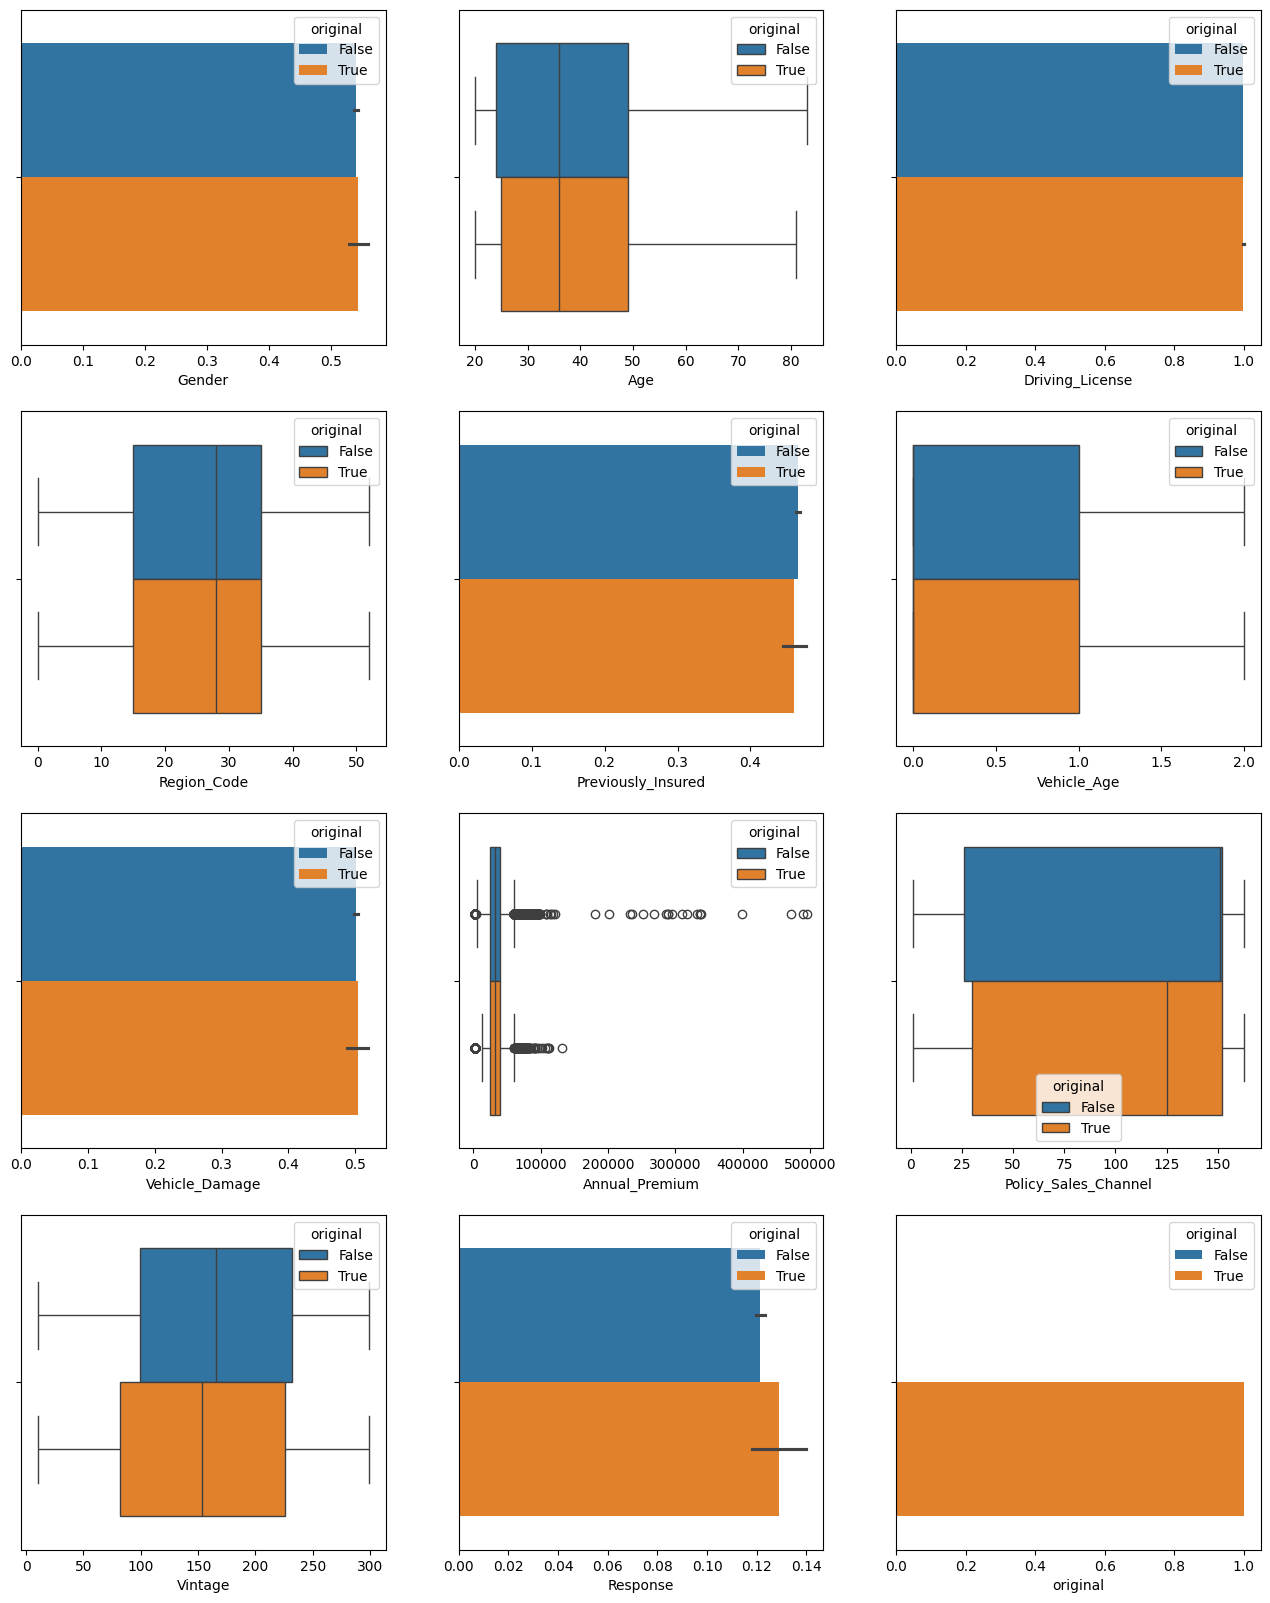

In [21]:
together = together.sample(frac=.01, random_state=42)

reshaped = np.reshape(together.columns, (4,3))

_, axs = plt.subplots(4, 3, figsize=(16, 20))

for i in range(4):
    for j in range(3):
        if (pd.api.types.is_bool_dtype(together[reshaped[i][j]].dtype)):
            ax = sns.barplot(x=together[reshaped[i][j]], ax=axs[i][j], hue=together["original"])
        else:
            ax = sns.boxplot(x=together[reshaped[i][j]], ax=axs[i][j], hue=together["original"])
        ax.set_ylabel(None)
        
ax.set_ylabel(None)